In [44]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Read the dataset and check the datatypes
whitewine1 = pd.read_csv("winequality-white.csv", sep = ";")
redwine1 = pd.read_csv("winequality-red.csv", sep = ";")

In [2]:
whitewine1.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [3]:
redwine1.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
 
#Count the number of missing values
whitewine1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
redwine1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#There are no missing values

In [7]:
# Show the correlation between qualities other than wine
correlation_data1 = whitewine1.loc[:, "fixed acidity":"alcohol"]
correlation_data1
correlation1 = correlation_data1.corr()
correlation1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433


In [8]:
correlation_data2 = redwine1.loc[:, "fixed acidity":"alcohol"]
correlation_data2
correlation2 = correlation_data2.corr()
correlation2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


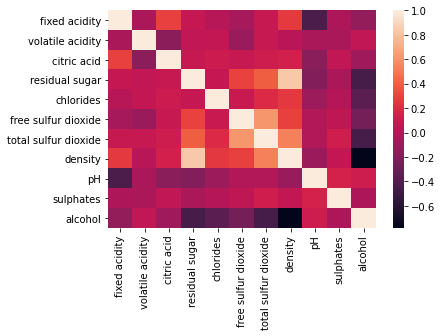

In [10]:

corr_plot1 = sns.heatmap(correlation_data1.corr())

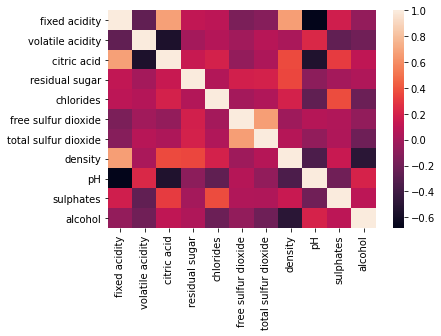

In [11]:
corr_plot2 = sns.heatmap(correlation_data2.corr())

Text(0.5, 1.0, 'Histogram of White Wine Quality')

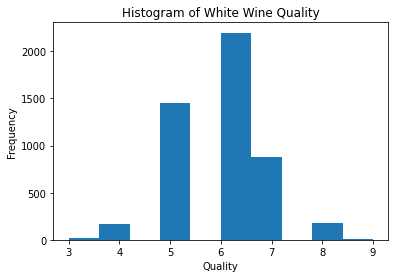

In [14]:
# PLot a histogram of the quality column in the wine dataframe
plt.hist(whitewine1['quality'])
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.title("Histogram of White Wine Quality")

Text(0.5, 1.0, 'Histogram of Red Wine Quality')

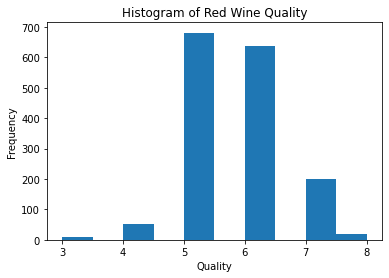

In [15]:
plt.hist(redwine1['quality'])
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.title("Histogram of Red Wine Quality")

In [16]:

# Classify the quality column as low,med,high
whitewine1_quality = whitewine1.copy()
whitewine1_quality['quality'].replace([3,4],['low','low'],inplace=True)
whitewine1_quality['quality'].replace([5,6],['med','med'],inplace=True)
whitewine1_quality['quality'].replace([7,8,9],['high','high','high'],inplace=True)

In [45]:
redwine1_quality = redwine1.copy()
redwine1_quality['quality'].replace([3,4],['low','low'],inplace=True)
redwine1_quality['quality'].replace([5,6],['med','med'],inplace=True)
redwine1_quality['quality'].replace([7,8,9],['high','high','high'],inplace=True)

In [46]:

#Normalize the dataset
def normalize(x):
    return ((x-min(x))/(max(x)-min(x)))

X = list(set(list(whitewine1_quality)) - set(['quality']))
whitewine2 = whitewine1_quality.iloc[:,].copy()
whitewine2[X] = whitewine2[X].apply(normalize)

Y = list(set(list(redwine1_quality)) - set(['quality']))
redwine2 = redwine1_quality.iloc[:,].copy()
redwine2[Y] = redwine2[Y].apply(normalize)

In [19]:

whitewine2_train, whitewine2_test, y_train1, y_test1 = train_test_split(whitewine2[X], whitewine2['quality'], test_size = 0.35, random_state = 42)

In [20]:
redwine2_train, redwine2_test, y_train2, y_test2 = train_test_split(redwine2[Y], redwine2['quality'], test_size = 0.35, random_state = 42)

In [23]:

from sklearn.neighbors import KNeighborsClassifier  
classifier1 = KNeighborsClassifier(n_neighbors=5) 
classifier1.fit(whitewine2_train[X], y_train1)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(redwine2_train[Y], y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
y_pred1 = classifier1.predict(whitewine2_test) 
y_pred1

array(['med', 'high', 'high', ..., 'med', 'high', 'med'], dtype=object)

In [47]:
y_pred2 = classifier2.predict(redwine2_test) 
y_pred2

array(['med', 'med', 'med', 'med', 'med', 'med', 'med', 'med', 'med',
       'med', 'med', 'med', 'med', 'med', 'med', 'high', 'med', 'med',
       'med', 'med', 'med', 'med', 'med', 'high', 'med', 'med', 'med',
       'med', 'med', 'med', 'med', 'med', 'med', 'med', 'med', 'med',
       'med', 'med', 'med', 'med', 'med', 'med', 'med', 'med', 'med',
       'med', 'med', 'med', 'med', 'med', 'med', 'med', 'med', 'high',
       'med', 'med', 'med', 'med', 'med', 'med', 'med', 'med', 'med',
       'med', 'high', 'med', 'med', 'med', 'high', 'med', 'high', 'med',
       'med', 'med', 'med', 'med', 'high', 'med', 'med', 'high', 'med',
       'high', 'med', 'med', 'med', 'med', 'med', 'med', 'high', 'med',
       'med', 'med', 'med', 'med', 'med', 'med', 'med', 'med', 'med',
       'med', 'med', 'med', 'med', 'med', 'med', 'med', 'med', 'med',
       'med', 'med', 'high', 'med', 'med', 'med', 'med', 'med', 'med',
       'med', 'med', 'med', 'med', 'med', 'med', 'med', 'med', 'med',
       'm

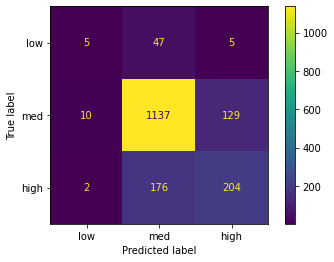

In [29]:
 
from sklearn.metrics import plot_confusion_matrix
confusion_matrix1 = plot_confusion_matrix(classifier1, whitewine2_test, y_test1, labels=['low', 'med', "high"], values_format = 'd') 

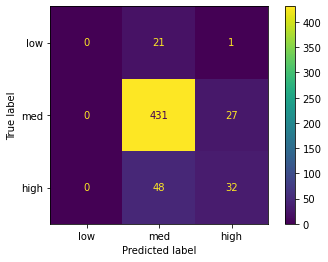

In [30]:
confusion_matrix2 = plot_confusion_matrix(classifier2, redwine2_test, y_test2, labels=['low', 'med', "high"], values_format = 'd')

In [31]:

#Get the accuracy, sensitivity, and specifitivity values
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix1 = confusion_matrix(y_test1,y_pred1, labels = ['low', 'med', 'high'])
confusion_matrix1

array([[   5,   47,    5],
       [  10, 1137,  129],
       [   2,  176,  204]])

In [32]:
confusion_matrix2 = confusion_matrix(y_test2,y_pred2, labels = ['low', 'med', 'high'])
confusion_matrix2

array([[  0,  21,   1],
       [  0, 431,  27],
       [  0,  48,  32]])

In [34]:
accuracy1 = metrics.accuracy_score(y_test1, y_pred1)
accuracy1

0.7848396501457726

In [35]:
accuracy2 = metrics.accuracy_score(y_test2, y_pred2)
accuracy2

0.8267857142857142

In [36]:
TN_low1 = confusion_matrix1[1,1] + confusion_matrix1[2,2]
FP_low1 = confusion_matrix1[1,0] + confusion_matrix1[2,0]
TN_med1 = confusion_matrix1[0,0] + confusion_matrix1[2,2]
FP_med1 = confusion_matrix1[0,1] + confusion_matrix1[2,1]
TN_high1 = confusion_matrix1[0,0] + confusion_matrix1[1,1]
FP_high1 = confusion_matrix1[0,2] + confusion_matrix1[1,2]
TP_low1 = confusion_matrix1[0,0]
FN_low1 = confusion_matrix1[0,1] + confusion_matrix1[0,2]
TP_med1 = confusion_matrix1[1,1]
FN_med1 = confusion_matrix1[1,0] + confusion_matrix1[1,2]
TP_high1 = confusion_matrix1[2,2]
FN_high1 = confusion_matrix1[2,0] + confusion_matrix1[2,1]

In [42]:
TN_low2 = confusion_matrix2[1,1] + confusion_matrix2[2,2]
FP_low2 = confusion_matrix2[1,0] + confusion_matrix2[2,0]
TN_med2 = confusion_matrix2[0,0] + confusion_matrix2[2,2]
FP_med2 = confusion_matrix2[0,1] + confusion_matrix2[2,1]
TN_high2 = confusion_matrix2[0,0] + confusion_matrix2[1,1]
FP_high2 = confusion_matrix2[0,2] + confusion_matrix2[1,2]
TP_low2 = confusion_matrix2[0,0]
FN_low2 = confusion_matrix2[0,1] + confusion_matrix2[0,2]
TP_med2 = confusion_matrix2[1,1]
FN_med2 = confusion_matrix2[1,0] + confusion_matrix2[1,2]
TP_high2 = confusion_matrix2[2,2]
FN_high2 = confusion_matrix2[2,0] + confusion_matrix2[2,1]

In [37]:
specitivity_low1 = TN_low1/(TN_low1+FP_low1)
specitivity_low1

0.991130820399113

In [48]:
specitivity_low2 = TN_low2/(TN_low2+FP_low2)
specitivity_low2

1.0

In [38]:
sensitivity_low1 = TP_low1/(TP_low1+FN_low1)
sensitivity_low1

0.08771929824561403

In [49]:
sensitivity_low2 = TP_low2/(TP_low2+FN_low2)
sensitivity_low2

0.0

In [39]:
specitivity_med1 = TN_med1/(TN_med1+FP_med1)
specitivity_med1

0.4837962962962963

In [50]:
specitivity_med2 = TN_med2/(TN_med2+FP_med2)
specitivity_med2

0.31683168316831684

In [ ]:
sensitivity_med1 = TP_med1/(TP_med1+FN_med1)
sensitivity_med1

0.8910658307210031

In [51]:
sensitivity_med2 = TP_med2/(TP_med2+FN_med2)
sensitivity_med2

0.9410480349344978

In [40]:
specitivity_high1 = TN_high1/(TN_high1+FP_high1)
specitivity_high1

0.8949843260188087

In [52]:
specitivity_high2 = TN_high2/(TN_high2+FP_high2)
specitivity_high2

0.9389978213507625

In [41]:
sensitivity_high1 = TP_high1/(TP_high1+FN_high1)
sensitivity_high1

0.5340314136125655

In [55]:
sensitivity_high2 = TP_high2/(TP_high2+FN_high2)
sensitivity_high2

0.4